# Linear Regression in Intel DAAL

This lab introduces basic inear regression and Ridge regression. Within Intel DAAL, there are two separate algorithms:
* Linear Regression: Basic simple and multiple linear regression without regularization
    * Two methods: Normal Equation and QR
* Ridge Regression: Linear regression with L2 regularization
    * Only support the normal equation method
    * Regularization parameters

In [1]:
%matplotlib inline

In [2]:
# Intel DAAL related imports
from daal.data_management import HomogenNumericTable

# Import DAAL implementation of linear regression and ridge regression
from regression import *
# Helpers
from utils import *

# Import numpy, sklearn, matplotlib, seaborn
import numpy as np
from sklearn.datasets import load_diabetes, load_boston
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting configurations
plt.rcParams['figure.figsize'] = (12, 8)
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [ ]:
diabetes_X = diabetes.data[:, 2, np.newaxis]
diabetes_Y = diabetes.target[:, np.newaxis]
diabetes_X_train = HomogenNumericTable(diabetes_X[:-20].astype(dtype=np.double))
diabetes_X_test = HomogenNumericTable(diabetes_X[-20:].astype(dtype=np.double))
diabetes_Y_train = HomogenNumericTable(diabetes_Y[:-20].astype(dtype=np.double))
diabetes_Y_test = HomogenNumericTable(diabetes_Y[-20:].astype(dtype=np.double))

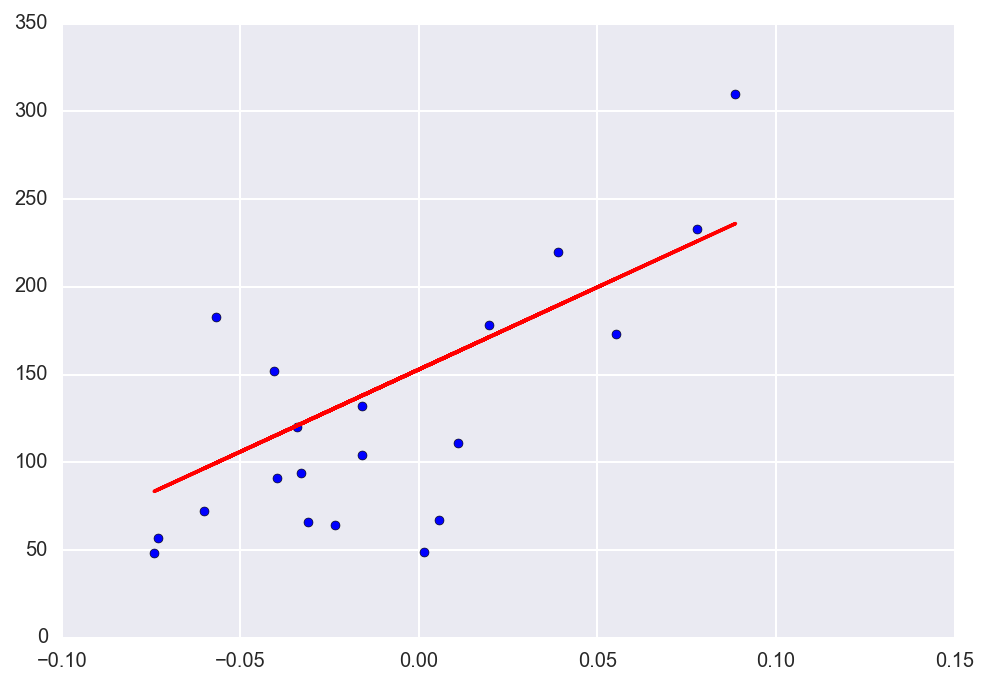

In [4]:
regr = LR('qr')
model = regr.train(diabetes_X_train, diabetes_Y_train)
predictions = regr.predict(model, diabetes_X_test)

plt.scatter(diabetes_X[-20:], diabetes_Y[-20:])
plt.plot(diabetes_X[-20:], getArrayFromNT(predictions), color='red')
plt.show()

In [5]:
boston = load_boston()
boston.data.shape

(506, 13)

In [11]:
boston_X_train = HomogenNumericTable(boston.data[:-100].astype(dtype=np.double))
boston_Y_train = HomogenNumericTable(boston.target[:-100, np.newaxis].astype(dtype=np.double))
boston_X_test = HomogenNumericTable(boston.data[-100:].astype(dtype=np.double))
boston_Y_test = HomogenNumericTable(boston.target[-100:, np.newaxis].astype(dtype=np.double))

In [12]:
regr = Ridge()
model = regr.train(boston_X_train, boston_Y_train)
predictions = regr.predict(model, boston_X_test)

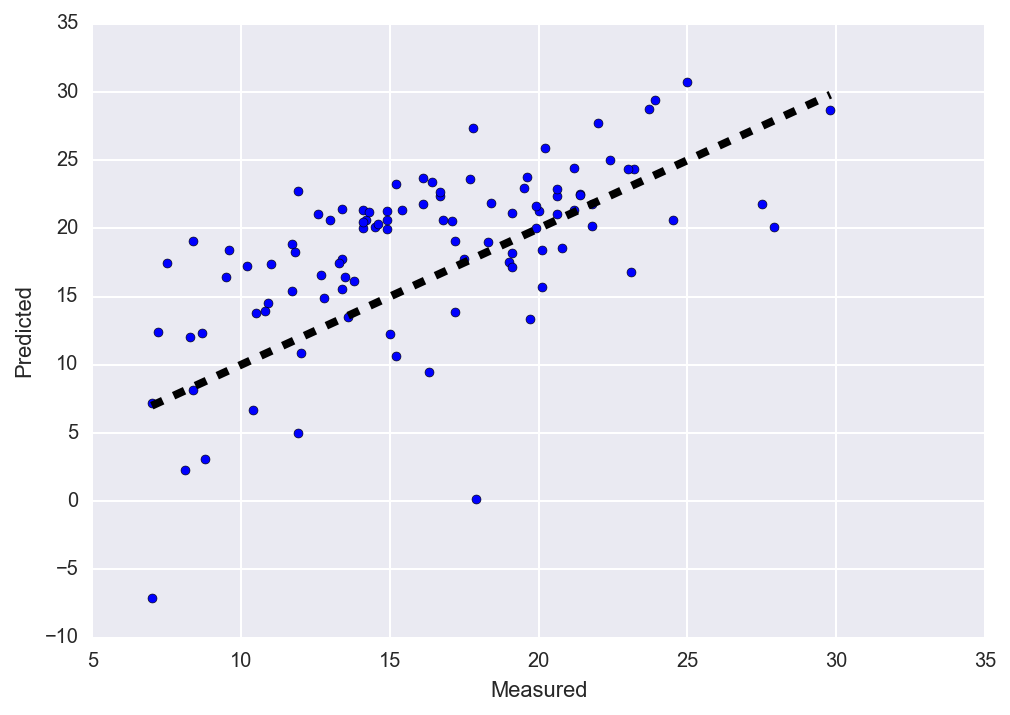

In [15]:
y = boston.target[-100:]
predicted = getArrayFromNT(predictions)

fig, ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()